In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\reviews_data_dump\\reviews_badminton\\data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
df.replace('',np.nan,inplace=True)
df.dropna(inplace=True)
print(df.isnull().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64


In [7]:
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [9]:
# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

# Method 1: Using numpy's where function
df['sentiment'] = np.where(df['Ratings'] == 5.0, 1,
                              np.where(df['Ratings'] == 4.0, 1, 0))
# Method 2: Using pandas' map function
# Create a dictionary mapping star ratings to sentiments
rating_sentiment_map = {5.0: 1, 4.0: 1, 1.0: 0, 2.0: 0, 3.0: 0}

# Map star ratings to sentiments using the dictionary
df['sentiment'] = df['Ratings'].map(rating_sentiment_map)
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


##  Step 1: Identify Input and Output

In [10]:
X = df["Review text"]
y = df["sentiment"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6410,)
Shape of X_test: (1603,)
Shape of y_train: (6410,)
Shape of y_test: (1603,)


## Step 3: Data Preprocessing on train data (X_train)

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords

def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
X_train_cleaned = X_train.apply(clean_text)

In [15]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_words)

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Apply lemmatization to the X_train_cleaned
X_train_cleaned = X_train_cleaned.apply(lemmatize_text)
X_train_cleaned

4201                                              awesome
1585                                         good product
1692            great product highly recommended practice
5742                                        worst quality
8127                                     good value money
                              ...                        
8406                       product good got best price fk
5652                                                 good
4440                                                super
254     love really guudas well fantastic delivery ear...
5617                                                 good
Name: Review text, Length: 6410, dtype: object

In [18]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# use it to extract features from cleaned training data
%time X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_cleaned)

print(X_train_tfidf.shape)

CPU times: total: 15.6 ms
Wall time: 55.8 ms
(6410, 2177)


### Step 4 - Data Preprocessing on test data (X_test)

In [19]:
# Apply text cleaning to the X_test
X_test_cleaned = X_test.apply(clean_text)

# Apply lemmatization to the X_test_cleaned
X_test_cleaned = X_test_cleaned.apply(lemmatize_text)
X_test_cleaned

3350                 bought flipkart totally bought price
2414                                             expected
6751                                                 good
8367                                                 nice
5773                                                 good
                              ...                        
7639                     timely delivery product expected
2143                                                 good
3564    good product quality practice shuttle work min...
2634                                                 good
1359                                                 nice
Name: Review text, Length: 1603, dtype: object

In [20]:
# Transform the cleaned X test data
%time X_test_tfidf = tfidf_vectorizer.fit_transform(X_test_cleaned)

print(X_test_tfidf.shape)

CPU times: total: 0 ns
Wall time: 13.1 ms
(1603, 882)


## Naive Bayes Model

In [21]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

# Train the classifier
nb= MultinomialNB()
%time nb.fit(X_train_tfidf, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 0 ns


MultinomialNB()

In [22]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_train_pred = nb.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8884555382215289
f1_score: 0.8741649941927364
confusion matrix:
 [[ 592  652]
 [  63 5103]]


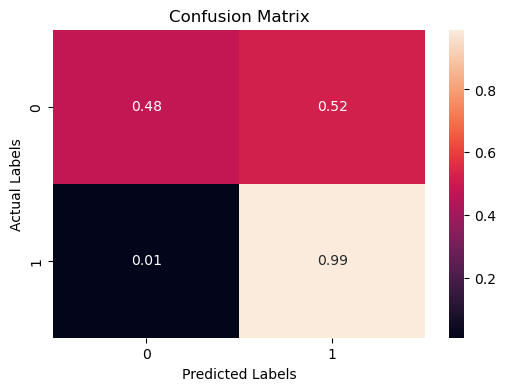

In [23]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [24]:
# Step-5: Test the model on test data
%time nb.fit(X_test_tfidf, y_test) 

CPU times: total: 0 ns
Wall time: 0 ns


MultinomialNB()

In [25]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = nb.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8945726762320648
f1_score: 0.879198558319291
confusion matrix:
 [[ 143  164]
 [   5 1291]]


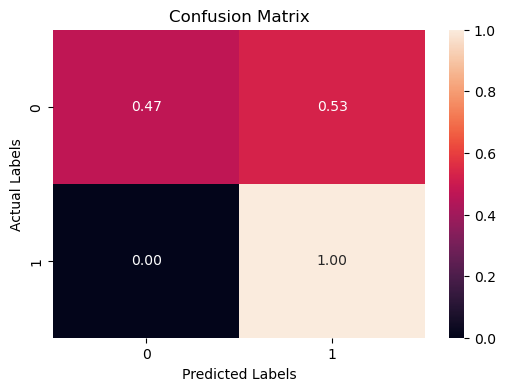

In [26]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## SVM model

In [27]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(kernel='linear')

%time svm.fit(X_train_tfidf, y_train)

CPU times: total: 422 ms
Wall time: 781 ms


SVC(kernel='linear')

In [28]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = svm.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9090483619344774
f1_score: 0.9013409453956255
confusion matrix:
 [[ 737  507]
 [  76 5090]]


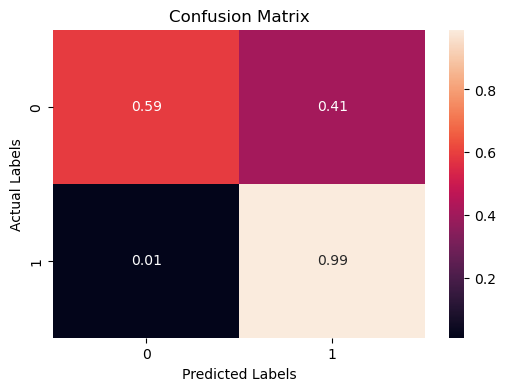

In [29]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [30]:
# Step-5: Test the model on test data
%time svm.fit(X_test_tfidf, y_test) 

CPU times: total: 0 ns
Wall time: 59.5 ms


SVC(kernel='linear')

In [31]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = svm.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9213973799126638
f1_score: 0.9158178510364754
confusion matrix:
 [[ 198  109]
 [  17 1279]]


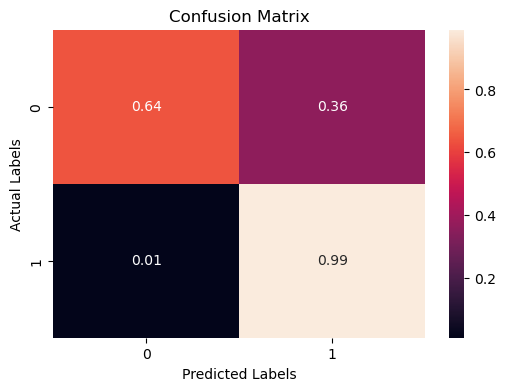

In [32]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Logistic Model

In [33]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lgr = LogisticRegression()

%time lgr.fit(X_train_tfidf, y_train)

CPU times: total: 46.9 ms
Wall time: 67.1 ms


LogisticRegression()

In [34]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = lgr.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)


Accuracy: 0.8897035881435258
f1_score: 0.8762302443584569
confusion matrix:
 [[ 606  638]
 [  69 5097]]


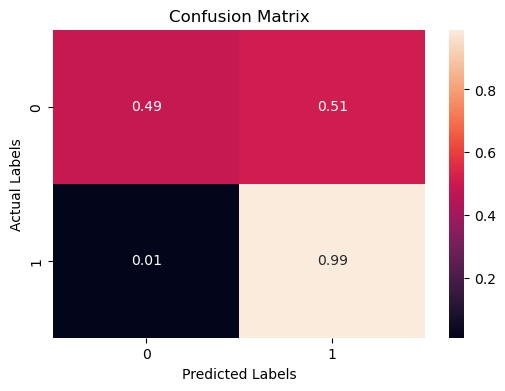

In [35]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [36]:
# Step-5: Test the model on test data
%time lgr.fit(X_test_tfidf, y_test)

CPU times: total: 0 ns
Wall time: 22.9 ms


LogisticRegression()

In [37]:

from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = lgr.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8870867124142233
f1_score: 0.8726230435896039
confusion matrix:
 [[ 144  163]
 [  18 1278]]


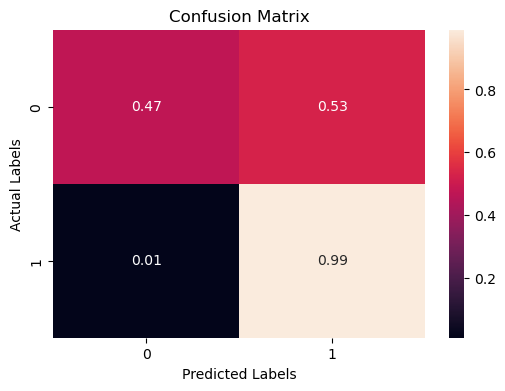

In [38]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Random Forest Model

In [39]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
random_forest = RandomForestClassifier()

%time random_forest.fit(X_train_tfidf, y_train)

CPU times: total: 2.52 s
Wall time: 5.25 s


RandomForestClassifier()

In [40]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = random_forest.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.950390015600624
f1_score: 0.9482251888779305
confusion matrix:
 [[ 961  283]
 [  35 5131]]


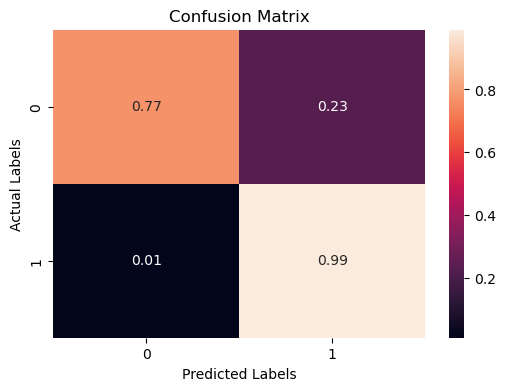

In [41]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Step-5: Test the model on test data
%time random_forest.fit(X_test_tfidf, y_test)

CPU times: total: 359 ms
Wall time: 991 ms


RandomForestClassifier()

In [43]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = random_forest.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.9600748596381784
f1_score: 0.9585572969050379
confusion matrix:
 [[ 248   59]
 [   5 1291]]


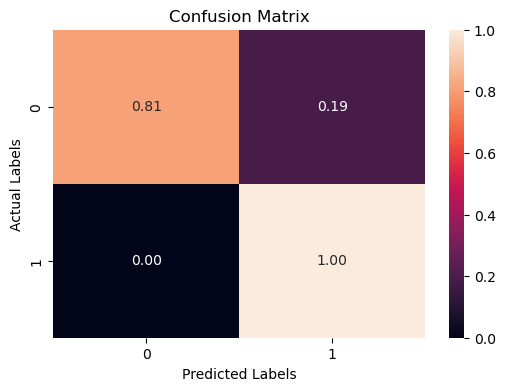

In [44]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## K-Nearest Neighbor model

In [45]:
# Step 5: Building a Model (i.e. Train the classifier)
# import classifiers from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kneighbors classifier
knn = KNeighborsClassifier()

%time knn.fit(X_train_tfidf, y_train)

CPU times: total: 0 ns
Wall time: 3.85 ms


KNeighborsClassifier()

## Step 6 - Evaluating on Train Data

In [46]:
# Step 6: Evaluate on train data
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = knn.predict(X_train_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", f1)


# Print the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8925117004680188
f1_score: 0.881387904211564
confusion matrix:
 [[ 648  596]
 [  93 5073]]


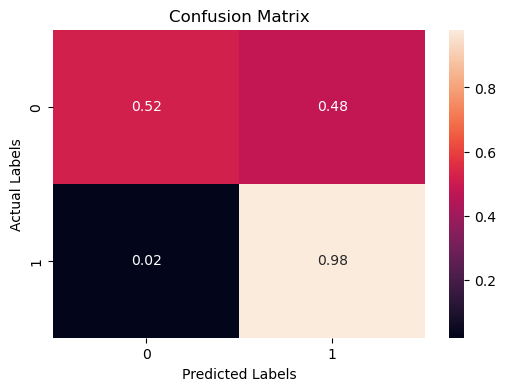

In [47]:
# Calculate the confusion matrix
cm =confusion_matrix(y_train, y_train_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

## Step 7 - Evaluate on Test Data

In [48]:
# Step-5: Test the model on test data
%time knn.fit(X_test_tfidf, y_test) 

CPU times: total: 0 ns
Wall time: 504 µs


KNeighborsClassifier()

In [49]:
# Step 7: Evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_pred = knn.predict(X_test_tfidf)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate the F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("f1_score:", f1)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("confusion matrix:\n", cm)

Accuracy: 0.8746101060511541
f1_score: 0.8521246873562499
confusion matrix:
 [[ 115  192]
 [   9 1287]]


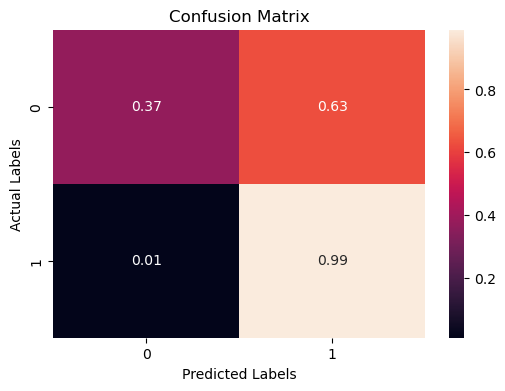

In [50]:
# Calculate the confusion matrix
cm =confusion_matrix(y_test, y_test_pred)

# Calculate row-wise sums (actual)
actual = np.sum(cm, axis=1).reshape(-1, 1)

# Normalize the confusion matrix
cmn = np.round(cm / actual, 2)

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title("Confusion Matrix")
plt.show()

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
import os
from joblib import load, dump

# Get the absolute path to the 'Pickle' directory
pickle_dir = os.path.abspath('Pickle')

# Load the models using absolute paths
nb = load(os.path.join(pickle_dir, 'MultinomialNB_model.pkl'))
svm = load(os.path.join(pickle_dir, 'SVC_model.pkl'))
lgr = load(os.path.join(pickle_dir, 'Logistic_Regression_model.pkl'))
random_forest = load(os.path.join(pickle_dir, 'Random_Forest_model.pkl'))
knn = load(os.path.join(pickle_dir, 'KNeighbors_model.pkl'))

# Load the TF-IDF vectorizer
tfidf_vectorizer = load(os.path.join(pickle_dir, 'tfidf_vectorizer.pkl'))

# Re-save the models
dump(nb, os.path.join(pickle_dir, 'MultinomialNB_model_updated.pkl'))
dump(svm, os.path.join(pickle_dir, 'SVC_model_updated.pkl'))
dump(lgr, os.path.join(pickle_dir, 'Logistic_Regression_model_updated.pkl'))
dump(random_forest, os.path.join(pickle_dir, 'Random_Forest_model_updated.pkl'))
dump(knn, os.path.join(pickle_dir, 'KNeighbors_model_updated.pkl'))

# Re-save the TF-IDF vectorizer
dump(tfidf_vectorizer, os.path.join(pickle_dir, 'tfidf_vectorizer_updated.pkl'))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Internship Innomatics\\Pickle\\MultinomialNB_model.pkl'

In [53]:
from joblib import load, dump

# Load the models
nb = load('Pickle/MultinomialNB_model.pkl')
svm = load('Pickle/SVC_model.pkl')
lgr = load('Pickle/Logistic_Regression_model.pkl')
random_forest = load('Pickle/Random_Forest_model.pkl')
knn = load('Pickle/KNeighbors_model.pkl')

# Load the TF-IDF vectorizer
tfidf_vectorizer = load('Pickle/tfidf_vectorizer.pkl')

# Re-save the models
dump(nb, 'Pickle/MultinomialNB_model_updated.pkl')
dump(svm, 'Pickle/SVC_model_updated.pkl')
dump(lgr, 'Pickle/Logistic_Regression_model_updated.pkl')
dump(random_forest, 'Pickle/Random_Forest_model_updated.pkl')
dump(knn, 'Pickle/KNeighbors_model_updated.pkl')

# Re-save the TF-IDF vectorizer
dump(tfidf_vectorizer, 'Pickle/tfidf_vectorizer_updated.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'Pickle/MultinomialNB_model.pkl'

In [52]:
from joblib import load, dump

# Load the models
nb = load('Pickle/MultinomialNB_model.pkl')
svm = load('Pickle/SVC_model.pkl')
lgr = load('Pickle/Logistic_Regression_model.pkl')
random_forest = load('Pickle/Random_Forest_model.pkl')
knn = load('Pickle/KNeighbors_model.pkl')

# Load the TF-IDF vectorizer
tfidf_vectorizer = load('Pickle/tfidf_vectorizer.pkl')

# Re-save the models
dump(nb, 'Pickle/MultinomialNB_model_updated.pkl')
dump(svm, 'Pickle/SVC_model_updated.pkl')
dump(lgr, 'Pickle/Logistic_Regression_model_updated.pkl')
dump(random_forest, 'Pickle/Random_Forest_model_updated.pkl')
dump(knn, 'Pickle/KNeighbors_model_updated.pkl')

# Re-save the TF-IDF vectorizer
dump(tfidf_vectorizer, 'Pickle/tfidf_vectorizer_updated.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'Pickle/MultinomialNB_model.pkl'

#### RandomForestClassifier has highest F1 score i.e
* Train Data:

  Accuracy: 0.950390015600624
  f1_score: 0.9482451862852638

* Test Data:

  Accuracy: 0.9600748596381784
  f1_score : 0.9585572969050379
  

In [ ]:
from joblib import load

# Load the Random Forest model from a .pkl file
random_forest_model = load('Pickle/Random_forest_model.pkl')
def predict_sentiment(input_text):
    # Preprocess the input text
    preprocess_text = clean_text(input_text)

    preprocessed_text = lemmatize_text(preprocess_text)

    # Transform the preprocessed text into numerical features
    features = tfidf_vectorizer.transform([preprocessed_text])
    
    # Make prediction using the loaded random forest model
    prediction = random_forest_model.predict(features)[0]
    
    # Convert the prediction to human-readable format
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

# Example usage:
input_text ="nice product"

sentiment = predict_sentiment(input_text)
print("Sentiment:", sentiment)